In [1]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import time
import os
import glob

In [2]:
AU = 1.496e8 #km

def get_positions_from_files(folder, timesteps, n_bodies):
    # position arrays
    n_timesteps = len(timesteps)
    x = [[None] * (n_timesteps) for _ in range(n_bodies)]
    y = [[None] * (n_timesteps) for _ in range(n_bodies)]
    z = [[None] * (n_timesteps) for _ in range(n_bodies)]
    
    # populate position arrays
    index = 0
    for timestep in timesteps:
        df = pd.read_csv(folder + "/t_%s.csv"%(str(timestep)))
        x_tmp = list(df["x"])
        y_tmp = list(df["y"])
        z_tmp = list(df["z"])
        
        for n in range(n_bodies):
            x[n][index] = x_tmp[n]
            y[n][index] = y_tmp[n]
            z[n][index] = z_tmp[n]  
        index += 1
      
    bodies = df["body"]
    return x, y, z, bodies

# function to compare for 1 body and 1 specific time
def compare_horizons(x_body, y_body, z_body, horizons_data):
    jpl_x = float(horizons_data[0])
    jpl_y = float(horizons_data[1])
    jpl_z = float(horizons_data[2])
    
    p_diff_x = abs((x_body - jpl_x)/jpl_x)*100
    p_diff_y = abs((y_body - jpl_y)/jpl_y)*100
    p_diff_z = abs((z_body - jpl_z)/jpl_z)*100

    return p_diff_x, p_diff_y, p_diff_z


# function to compare for 1 body and 1 specific time
def compare_horizons_no_divide(x_body, y_body, z_body, horizons_data):
    jpl_x = float(horizons_data[0])
    jpl_y = float(horizons_data[1])
    jpl_z = float(horizons_data[2])
    
    p_diff_x = abs(x_body - jpl_x)
    p_diff_y = abs(y_body - jpl_y)
    p_diff_z = abs(z_body - jpl_z)

    return p_diff_x, p_diff_y, p_diff_z

## 1: Timestep = any

In [3]:
# timestep = 1 day
# interval = 365 # horizon interval in data (days)
# n_compare = 250 # number of comparizons to do with horizons data
# n_days_timestep = 1 # from simulation. assume we chose n_days_timestep for which we have files at each "interval" days
# folder = "positions_250_years_init_01_01_1750"
# n_bodies = 9
# horizons_file = "horizons_files/horizons_data_1750_250_years.csv"
# accuracy_folder = 'accuracies/1750_250_years' # to save accuracy files
# output_graph_file = "1_day_timestep.png"
# dataframe_file = "slopes/1_day_timestep_slopes.csv"
# no_divide = True

# # timestep = 0.5 day
# interval = 365 # horizon interval in data (days)
# n_compare = 250 # number of comparizons to do with horizons data
# n_days_timestep = 0.5 # from simulation. assume we chose n_days_timestep for which we have files at each "interval" days
# folder = "positions_250_years_init_01_01_1750_half_day_timestep"
# n_bodies = 9
# horizons_file = "horizons_files/horizons_data_1750_250_years.csv"
# accuracy_folder = 'accuracies/1750_250_years_half_day_timestep' # to save accuracy files
# output_graph_file = "0.5_day_timestep.png"
# dataframe_file = "slopes/0.5_day_timestep_slopes.csv"
# no_divide = True

# # timestep = 0.25 day
# interval = 365 # horizon interval in data (days)
# n_compare = 250 # number of comparizons to do with horizons data
# n_days_timestep = 0.25 # from simulation. assume we chose n_days_timestep for which we have files at each "interval" days
# folder = "positions_250_years_init_01_01_1750_quarter_day_timestep"
# n_bodies = 9
# horizons_file = "horizons_files/horizons_data_1750_250_years.csv"
# accuracy_folder = 'accuracies/1750_250_years_quarter_day_timestep' # to save accuracy files
# output_graph_file = "0.25_day_timestep.png"
# dataframe_file = "slopes/0.25_day_timestep_slopes.csv"
# no_divide = True

# timestep = 2.5 days
interval = 365 # horizon interval in data (days)
n_compare = 250 # number of comparizons to do with horizons data
n_days_timestep = 2.5 # from simulation. assume we chose n_days_timestep for which we have files at each "interval" days
folder = "positions_250_years_init_01_01_1750_2.5_day_timestep"
n_bodies = 9
horizons_file = "horizons_files/horizons_data_1750_250_years.csv"
accuracy_folder = 'accuracies/1750_250_years_2.5_day_timestep' # to save accuracy files
output_graph_file = "2.5_day_timestep.png"
dataframe_file = "slopes/2.5_day_timestep_slopes.csv"
no_divide = True

# # timestep = 0.125 days
# interval = 365 # horizon interval in data (days)
# n_compare = 250 # number of comparizons to do with horizons data
# n_days_timestep = 0.125 # from simulation. assume we chose n_days_timestep for which we have files at each "interval" days
# folder = "positions_250_years_init_01_01_1750_0.125_day_timestep"
# n_bodies = 9
# horizons_file = "horizons_files/horizons_data_1750_250_years.csv"
# accuracy_folder = 'accuracies/1750_250_years_0.125_day_timestep' # to save accuracy files
# output_graph_file = "0.125_day_timestep.png"
# dataframe_file = "slopes/0.125_day_timestep_slopes.csv"
# no_divide = True

# # timestep = 1 day AND FIX SUN
# interval = 365 # horizon interval in data (days)
# n_compare = 250 # number of comparizons to do with horizons data
# n_days_timestep = 1 # from simulation. assume we chose n_days_timestep for which we have files at each "interval" days
# folder = "positions_250_years_init_01_01_1750_fix_sun"
# n_bodies = 9
# horizons_file = "horizons_files/horizons_data_1750_250_years.csv"
# accuracy_folder = 'accuracies/1750_250_years_fix_sun' # to save accuracy files
# output_graph_file = "1_day_timestep_fix_sun.png"
# dataframe_file = "slopes/1_day_timestep_fix_sun_slopes.csv"
# no_divide = True

# # timestep = ... day AND RUNGA KUTTA
# interval = 365 # horizon interval in data (days)
# n_compare = 250 # number of comparizons to do with horizons data
# n_days_timestep = 2.5 # from simulation. assume we chose n_days_timestep for which we have files at each "interval" days
# folder = "positions_250_years_init_01_01_1750_2.5_day_timestep_runga_kutta"
# n_bodies = 9
# horizons_file = "horizons_files/horizons_data_1750_250_years.csv"
# accuracy_folder = 'accuracies/1750_250_years_2.5_day_timestep_runga_kutta' # to save accuracy files
# output_graph_file = "2.5_day_timestep_runga_kutta.png"
# dataframe_file = "slopes/2.5_day_timestep_runga_kutta_slopes.csv"
# no_divide = True



In [4]:
if not os.path.exists(accuracy_folder):
        os.mkdir(accuracy_folder)

In [5]:
# need to get which timesteps want to compare IN DAYS (bc it is how I get horozons data)
day_timesteps = list(range(0, interval * n_compare + 1, interval)) # days
# print(day_timesteps)

# now, these numbers might be different based on the timestep of simulation
simulation_timesteps = [int(i/n_days_timestep) for i in day_timesteps]
# print(simulation_timesteps)

# timesteps = index in horizons files
horizons_timesteps = list(range(n_compare+1))
# print(horizons_timesteps)

print(len(day_timesteps))
print(len(simulation_timesteps))
print(len(horizons_timesteps))

251
251
251


In [6]:
# get trajectories 
x, y, z, bodies = get_positions_from_files(folder, simulation_timesteps, n_bodies)

# get horizons file:
horizons = pd.read_csv(horizons_file)
display(horizons)

position_sun  \
0    -468011.8883121092,151780.3309712668,3952.9530...   
1    -378467.817837759,-185816.5845392546,3795.0700...   
2    -125394.3328832355,-398045.4287013639,-243.998...   
3    189022.7236554295,-421741.1095213876,-6096.524...   
4    456393.5985868843,-263609.1766951701,-11422.87...   
..                                                 ...   
246  -474574.4478357823,1120911.151274877,9275.9994...   
247  -866950.1110097959,954481.4045385986,19788.026...   
248  -1159323.795336588,600178.2608643107,28537.064...   
249  -1255628.851357108,126155.5772284936,32962.713...   
250  -1113888.853894942,-348862.0589613738,31663.05...   

                                          velocity_sun  \
0    -0.0003258233500816845,-0.01163403930534814,6....   
1    0.005864000933944094,-0.009201472520037854,-6....   
2    0.009758550921079738,-0.003802094744023258,-0....   
3    0.009855561903053716,0.002252188473068533,-0.0...   
4    0.006770717680778921,0.007470994543178877,-0.0...   
..                                                 ...   
246  -0.01293637972320619,-0.002071530007355724,0.0...   
247  -0.0112901105649106,-0.00846103664742044,0.000...   
248  -0.006532155816813131,-0.01382142513569154,0.0...   
249  0.0006798214817571041,-0.01575201778216168,5.8...   
250  0.008290406330901003,-0.01374683912243877,-0.0...   

                                        position_earth  \
0    -36208597.47896259,142827245.8730925,84067.570...   
1    -35484154.71740879,142655329.4191826,82526.321...   
2    -34573826.13109529,142590642.7656642,78695.383...   
3    -33599886.91363302,142729359.2515553,72660.910...   
4    -32695892.68111963,143037655.1538401,67139.320...   
..                                                 ...   
246  112966634.4159214,96821083.59978852,10110.6628...   
247  113013453.8325714,96149269.14523873,21180.3375...   
248  113157869.8982592,95299653.70851825,28909.1890...   
249  113485784.0851523,94320526.10347451,33428.5911...   
250  114061417.8559825,93330768.70251065,31216.4908...   

                                        velocity_earth  \
0    -29.38923058167892,-7.345469879141083,-0.00544...   
1    -29.41808679472956,-7.233285683621293,-0.00604...   
2    -29.42710533351322,-7.084554502874352,-0.00447...   
3    -29.48151777915633,-6.93995292844524,-0.006522...   
4    -29.50648025201293,-6.822656983615272,-0.00444...   
..                                                 ...   
246  -19.70964837641263,22.6433873013304,0.00137729...   
247  -19.59239630782811,22.73962645441382,0.0001558...   
248  -19.50504513561513,22.82121879338824,1.3088455...   
249  -19.38197651312552,22.88383522233716,0.0010153...   
250  -19.26760946149682,22.99430527872656,-0.001180...   

                                      position_jupiter  \
0    734795831.9718618,87840456.21468413,-16884627....   
1    567492037.6209549,479833057.4648454,-14673829....   
2    222896222.2906426,722943206.5829668,-7884390.8...   
3    -189058698.1559705,752238179.2962409,1267923.4...   
4    -550211233.0120993,573567697.8528115,10101756....   
..                                                 ...   
246  -98785983.8008579,-784060690.323298,5460665.08...   
247  299362935.0809696,-710022607.5612104,-3761199....   
248  612044631.7931895,-437283060.3750183,-11891798...   
249  740082337.8623972,-34223166.89477238,-16427470...   
250  636087243.9608077,379079143.5752778,-15810841....   

                                      velocity_jupiter  \
0    -1.711418927962744,13.59088723021772,-0.015433...   
1    -8.596765590317471,10.59821530525294,0.1514136...   
2    -12.64865850697126,4.469253733195212,0.2668445...   
3    -12.83292728320907,-2.570339831476224,0.298891...   
4    -9.586942650858056,-8.432123319018292,0.249167...   
..                                                 ...   
246  12.79134878447332,-1.019257355115281,-0.282192...   
247  11.86340989520472,5.687770865769404,-0.2892525...   
248  7.420111683094178,11.240288208

In [7]:
for i_body in range(len(bodies)):
    years = []
    percentages_x = []
    percentages_y = []
    percentages_z = []
    
    # print(bodies[i_body])
    data_horizons = horizons["position_%s"%(bodies[i_body])]
    # display(data_horizons)
    for i_timestep in horizons_timesteps:
        # print("index timestep:", i_timestep)
        position = data_horizons[i_timestep].split(",")
        position = [float(i)/AU for i in position]

        x_body = x[i_body][i_timestep]
        y_body = y[i_body][i_timestep]
        z_body = z[i_body][i_timestep]
        
        if no_divide == True:
            p_diff_x, p_diff_y, p_diff_z = compare_horizons_no_divide(x_body, y_body, z_body, position)
        else:
            p_diff_x, p_diff_y, p_diff_z = compare_horizons(x_body, y_body, z_body, position)

        years.append(i_timestep)
        percentages_x.append(p_diff_x)
        percentages_y.append(p_diff_y)
        percentages_z.append(p_diff_z)
    
    # now store
    df = pd.DataFrame()
    df["year"] = years
    df["percentage_diff_x"] = percentages_x
    df["percentage_diff_y"] = percentages_y
    df["percentage_diff_z"] = percentages_z
    
    # display(df)
    df.to_csv(accuracy_folder + "/%s.csv"%(bodies[i_body]), index = False)

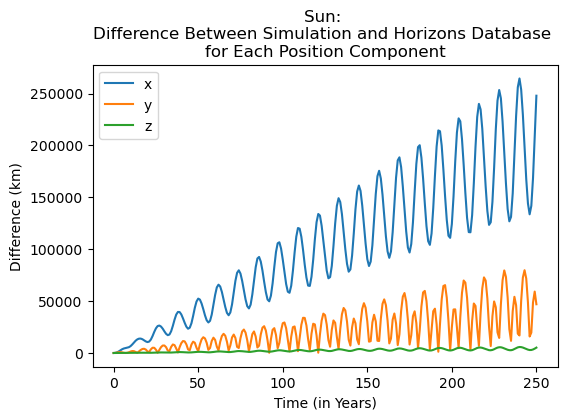

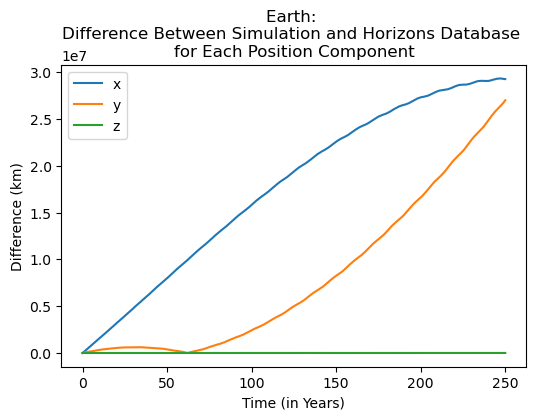

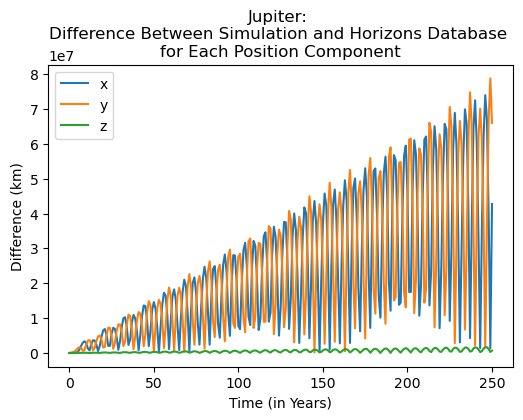

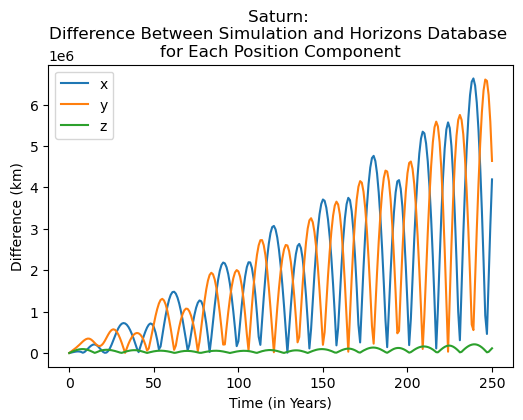

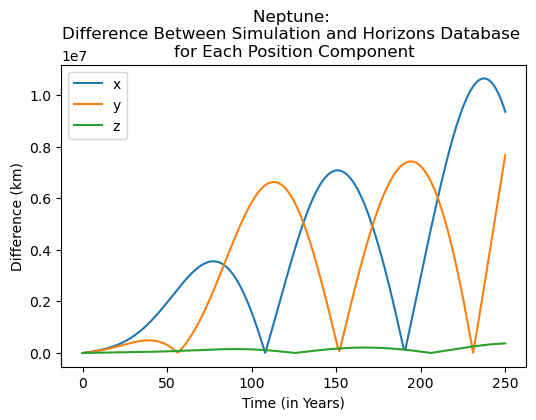

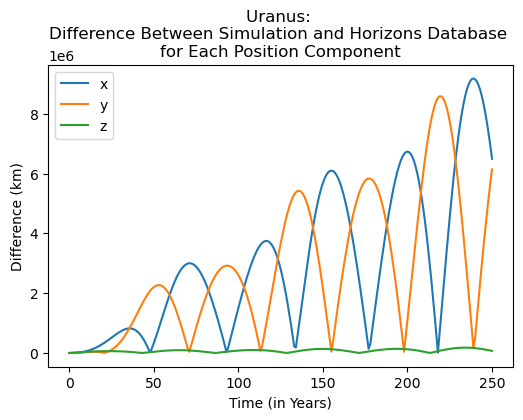

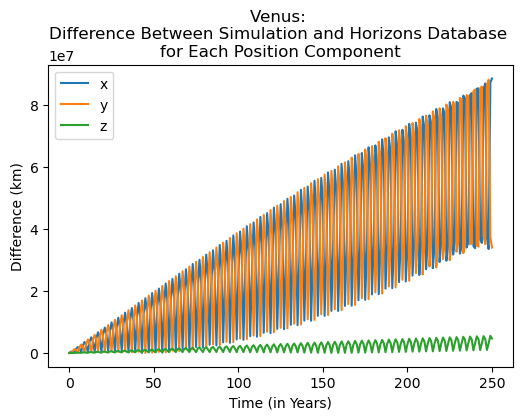

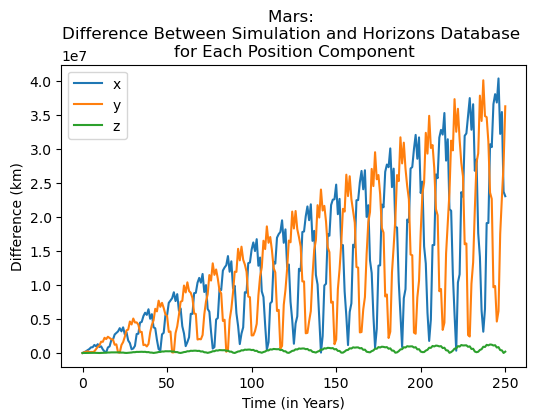

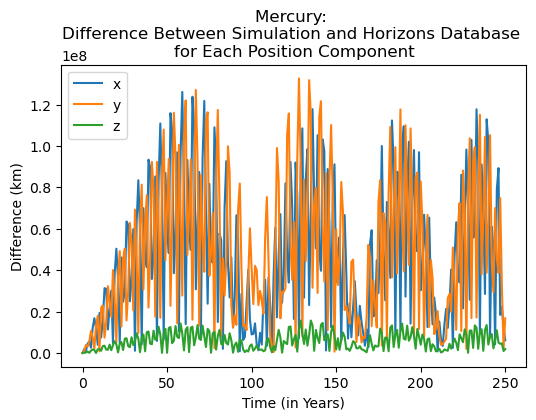

In [8]:
for body in bodies:
#     print(body)
    df = pd.read_csv(accuracy_folder + "/%s.csv"%(body))
#     display(df)
    
    plt.figure(dpi = 100)
    plt.plot(df['year'], df['percentage_diff_x']*AU, label = 'x')
    plt.plot(df['year'], df['percentage_diff_y']*AU, label = 'y')
    plt.plot(df['year'], df['percentage_diff_z']*AU, label = 'z')
    plt.legend()
    plt.xlabel("Time (in Years)")
    if no_divide == True:
        plt.ylabel("Difference (km)")
        plt.title("%s: \nDifference Between Simulation and Horizons Database \nfor Each Position Component"%(body.capitalize()))
    else:
#         plt.ylim(0, 100)
        plt.ylabel("Percentage of Difference (%)")
        plt.title("%s: \nPercentage of Difference With Each Position Component"%(body.capitalize()))
    plt.show()

In [9]:
# now plot difference as a percentage of the planet usual orbit (length of semi major axis)
# biggest orbit for ['sun', 'earth', 'jupiter', 'saturn', 'neptune', 'uranus', 'venus', 'mars', 'mercury']
# averages 
orbits = [827640, 149600000, 778330000, 1429400000, 4504300000, 2870990000, 108200000, 227940000, 57910000] # from https://nineplanets.org/solar-system-data/
orbits_2 = [827640/AU, 1.000, 5.2028, 9.5388, 30.0611, 19.1914, 0.7233, 1.5273, 0.3871] #in AU from
orbits_2 = [i * AU for i in orbits_2]
print(orbits_2)
# for sun: https://astronomy.stackexchange.com/questions/44851/is-the-barycenter-of-the-solar-system-usually-outside-of-the-sun

# ind = 0
# for body in bodies:
# #     print(body)
#     df = pd.read_csv(accuracy_folder + "/%s.csv"%(body))
    
#     plt.figure(dpi = 100)
#     plt.plot(df['year'], df['percentage_diff_x']*AU/orbits_2[ind], label = 'x')
#     plt.plot(df['year'], df['percentage_diff_y']*AU/orbits_2[ind], label = 'y')
#     plt.plot(df['year'], df['percentage_diff_z']*AU/orbits_2[ind], label = 'z')
#     plt.legend()
#     plt.xlabel("Time (in Years)")
#     if no_divide == True:
#         plt.ylabel("Difference (km)")
#         plt.title("%s: \nDifference Between Simulation and Horizons Database \nfor Each Position Component"%(body.capitalize()))
#     else:
# #         plt.ylim(0, 100)
#         plt.ylabel("Percentage of Difference (%)")
#         plt.title("%s: \nPercentage of Difference With Each Position Component"%(body.capitalize()))
#     plt.show()
#     ind += 1


[827640.0, 149600000.0, 778338880.0, 1427004480.0, 4497140560.0, 2871033440.0, 108205680.00000001, 228484080.00000003, 57910160.0]


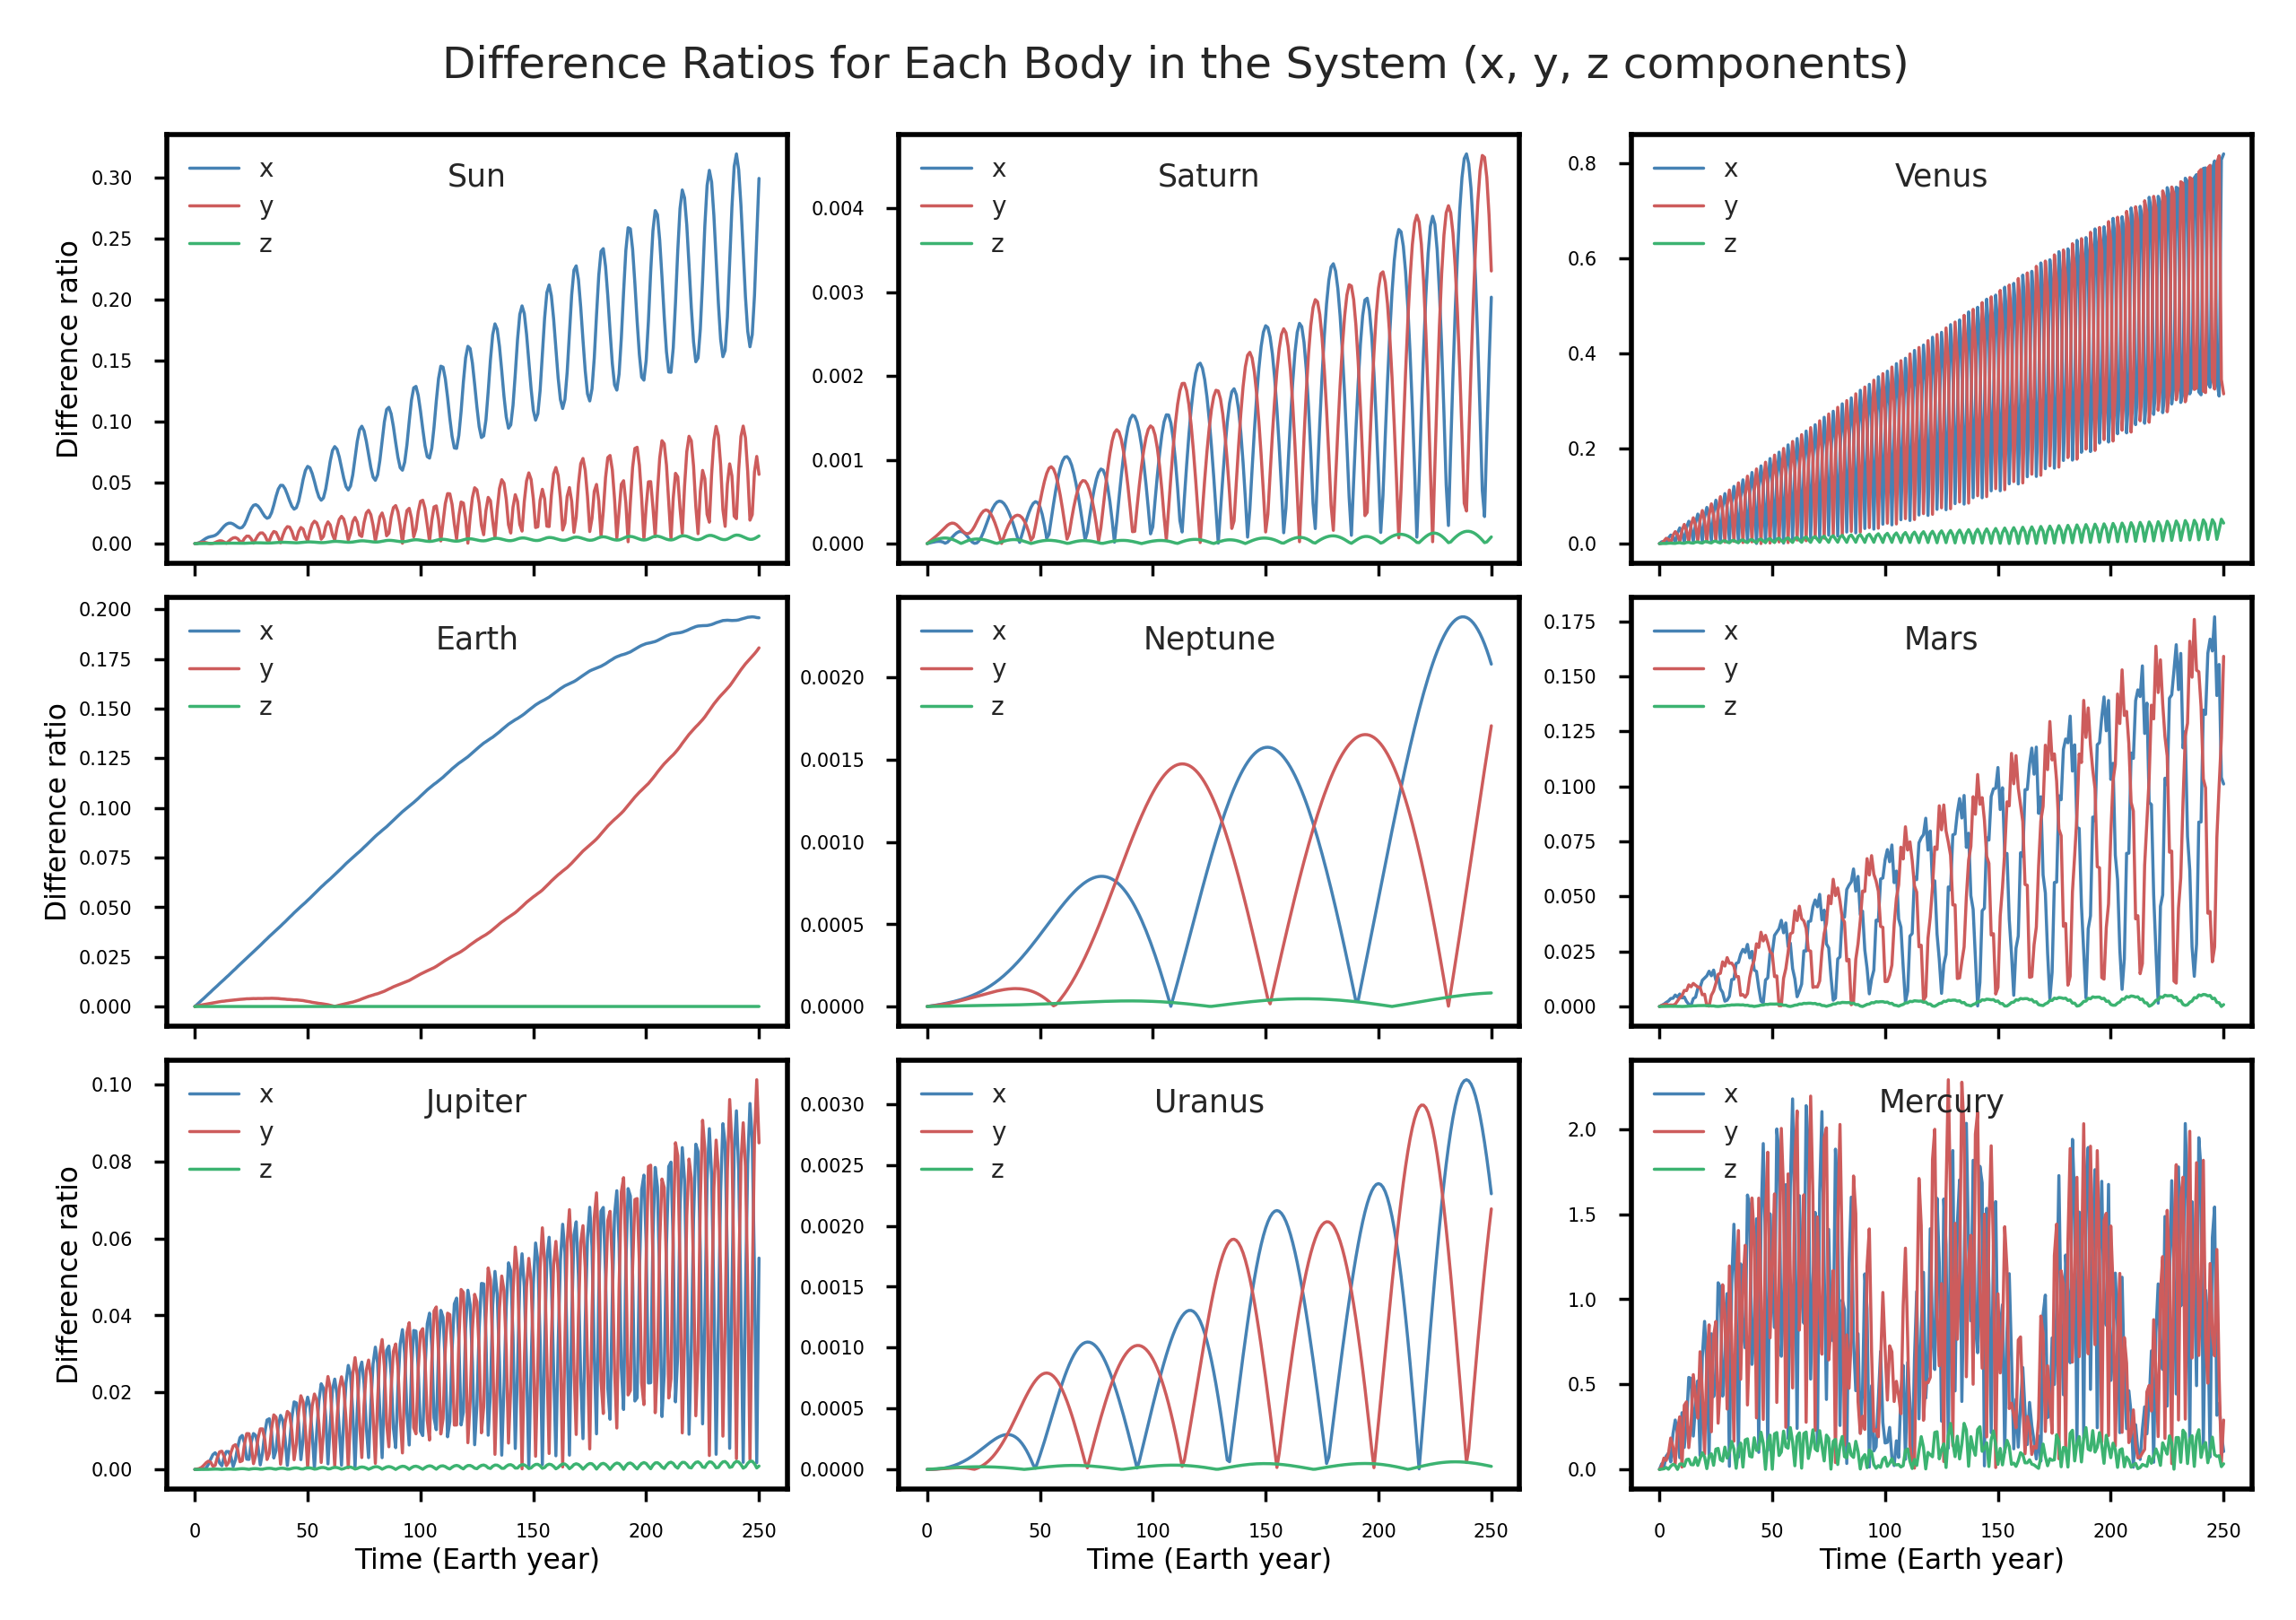

In [10]:
# now do cool plot ONLY IF USED NO DIVIDE BEFORE
# NEED Nno_divide == True

if no_divide:
    figure, ax = plt.subplots(3, 3)
    plt.style.use("seaborn")
    figure.set_dpi(500)
    i_h = [0, 1, 2, 0, 1, 2, 0, 1, 2]
    i_v = [0, 0, 0, 1, 1, 1, 2, 2, 2]
    ind = 0
    for body in bodies:
    #     print(body)
        df = pd.read_csv(accuracy_folder + "/%s.csv"%(body))
        ax[i_h[ind]][i_v[ind]].plot(df['year'], df['percentage_diff_x']*AU/orbits_2[ind], label = 'x', linewidth = 0.5, c = "steelblue")
        ax[i_h[ind]][i_v[ind]].plot(df['year'], df['percentage_diff_y']*AU/orbits_2[ind], label = 'y', linewidth = 0.5, c = "indianred")
        ax[i_h[ind]][i_v[ind]].plot(df['year'], df['percentage_diff_z']*AU/orbits_2[ind], label = 'z', linewidth = 0.5, c = "mediumseagreen")
        leg = ax[i_h[ind]][i_v[ind]].legend(fontsize="4")
        leg.get_frame().set_linewidth(0.2)
        leg.get_frame().set_edgecolor('k')

        if i_h[ind] == 2:
            ax[i_h[ind]][i_v[ind]].set_xlabel("Time (Earth year)", fontsize=4.5, labelpad=1)

        ax[i_h[ind]][i_v[ind]].tick_params('both', length=2, width=0.5)
        ax[i_h[ind]][i_v[ind]].tick_params(axis='x', labelsize=3)
        ax[i_h[ind]][i_v[ind]].tick_params(axis='y', labelsize=3)
        
        if i_v[ind] == 0:
            ax[i_h[ind]][i_v[ind]].set_ylabel("Difference ratio", fontsize=4.5, labelpad=1)
        plt.text(0.5, 0.9, body.capitalize(), horizontalalignment='center',verticalalignment='center', transform= ax[i_h[ind]][i_v[ind]].transAxes, fontsize = 5)
        ax[i_h[ind]][i_v[ind]].grid(False)
        ind += 1

    figure.subplots_adjust(hspace=0.08)
    figure.subplots_adjust(wspace=0.18)
    plt.suptitle("Difference Ratios for Each Body in the System (x, y, z components)", fontsize = 7, y = 0.93)
    plt.savefig("accuracy_1_day_timestep.png", dpi = 500)
    plt.show()

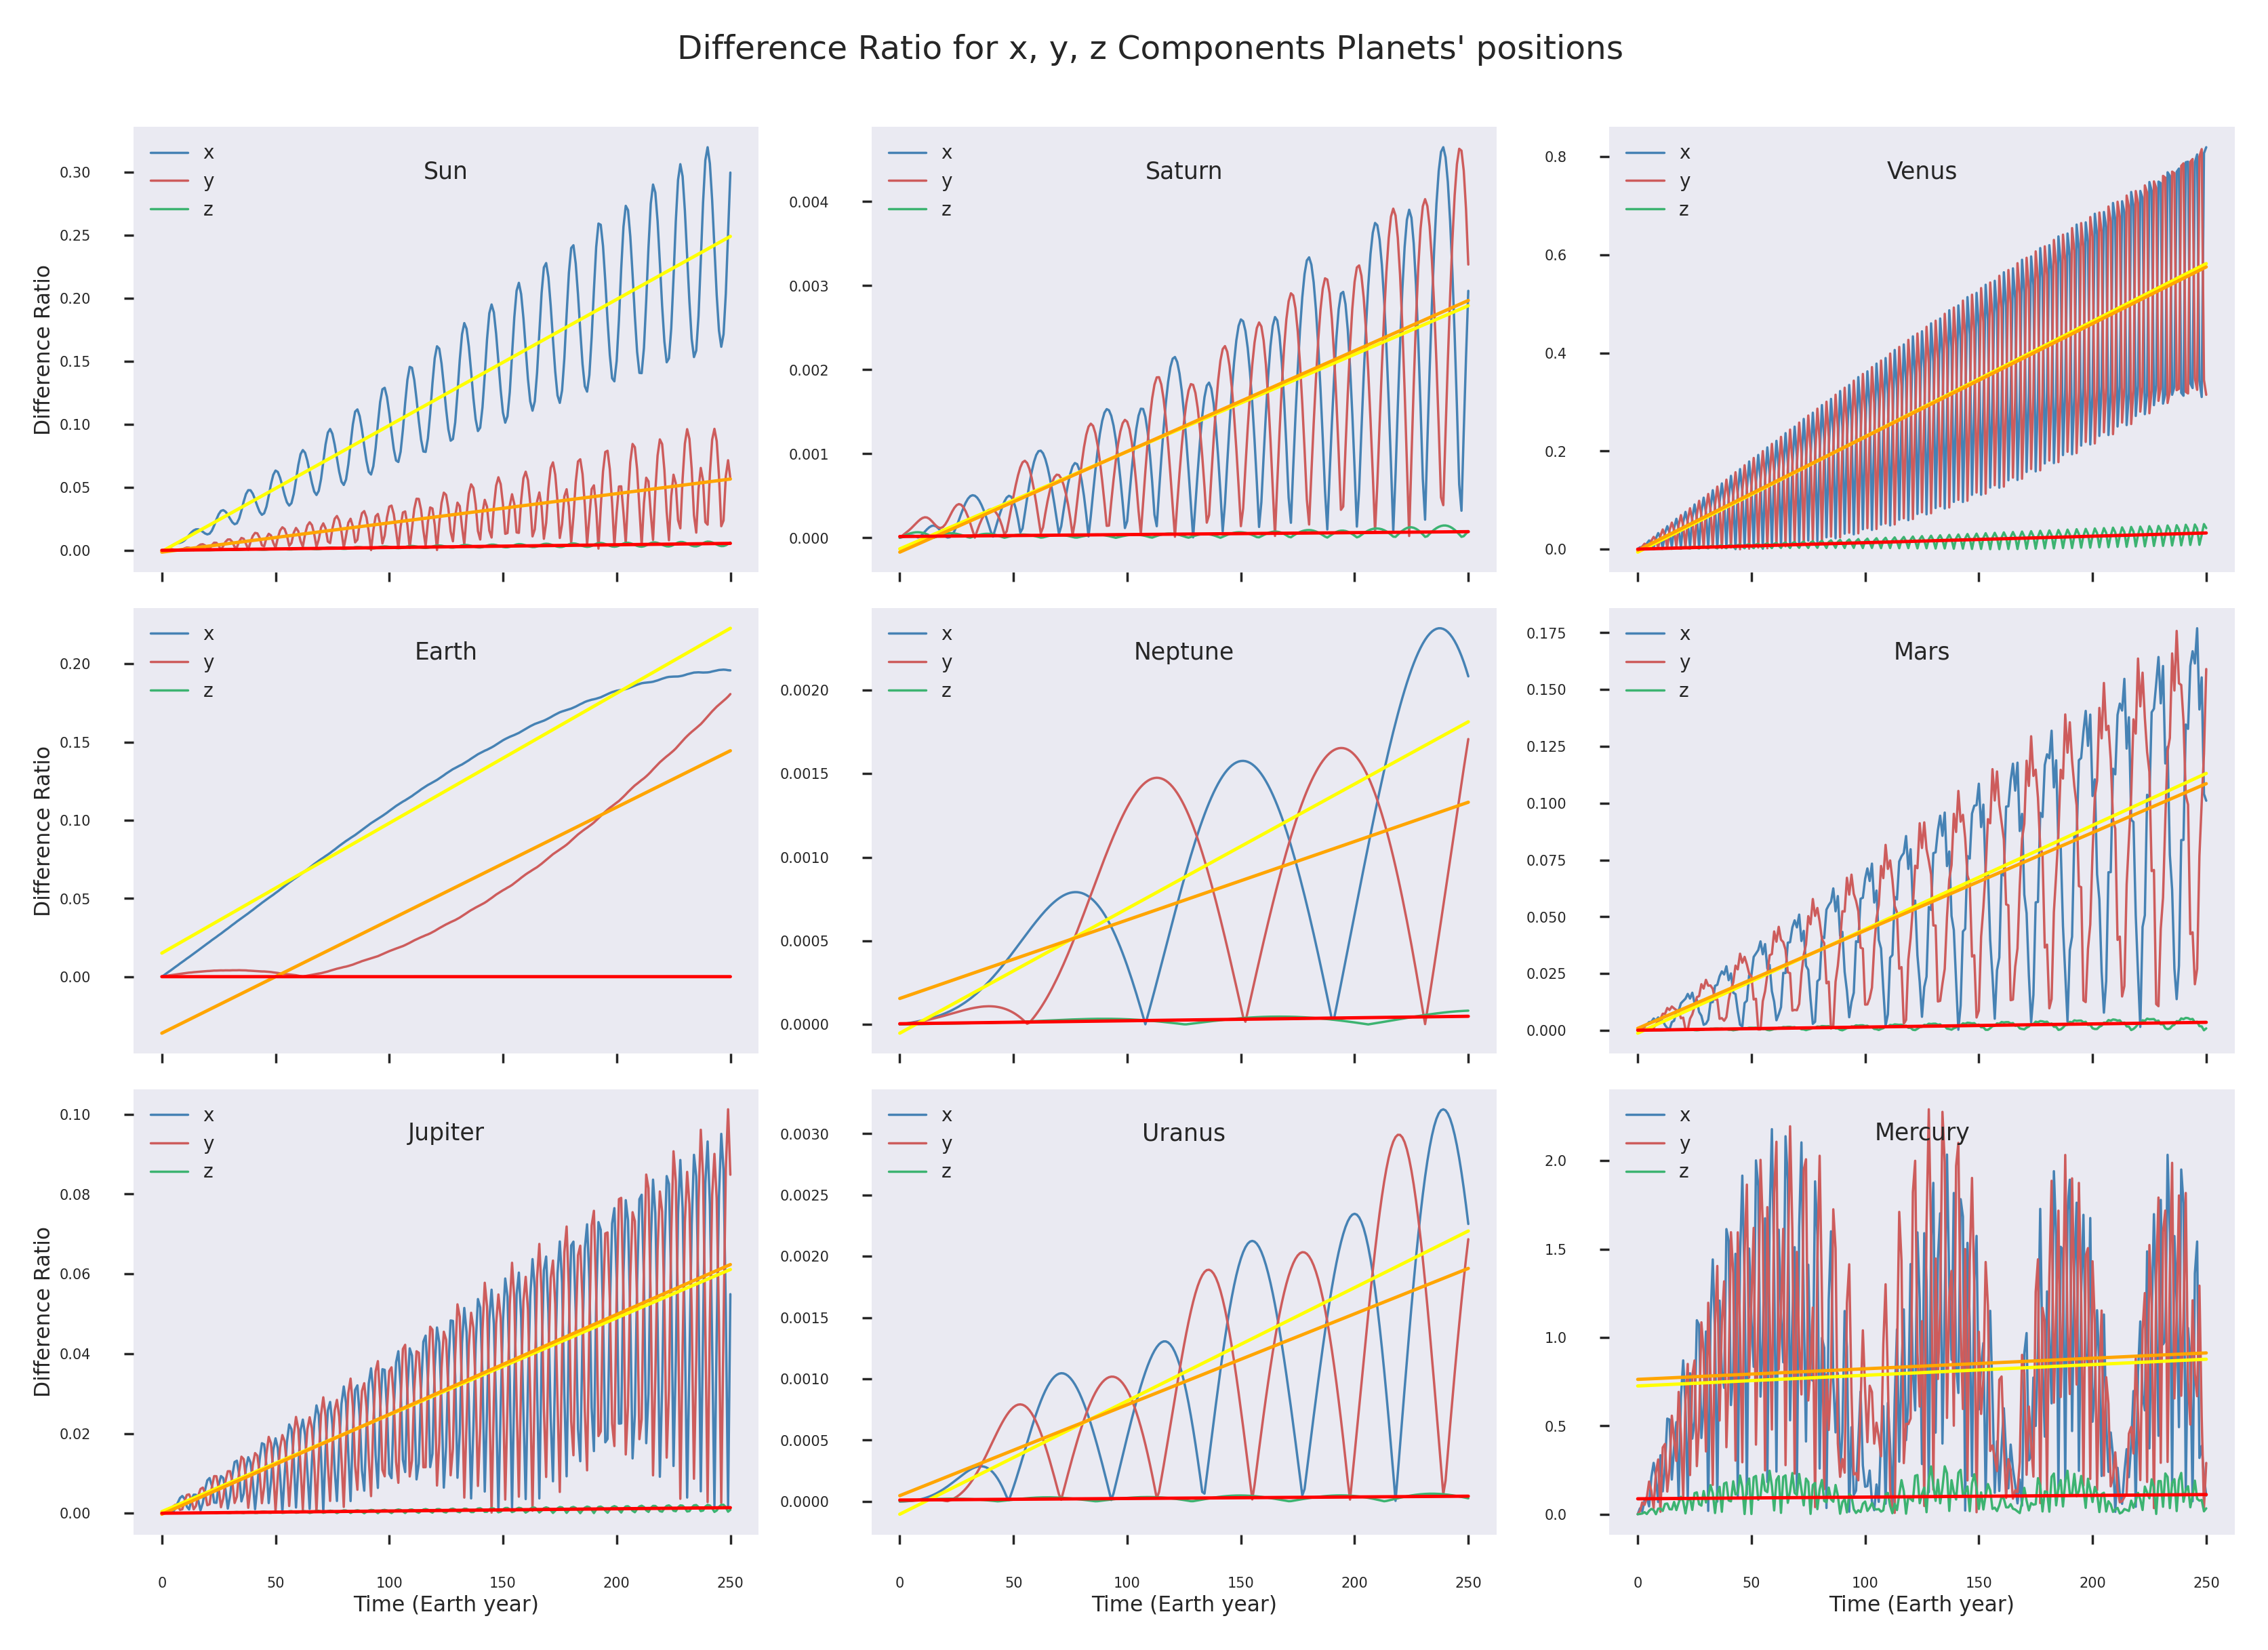

In [12]:
# now find the trends with linear regression
a_x = []
a_y = []
a_z = []
b_x = []
b_y = []
b_z = []

if no_divide:
    figure, ax = plt.subplots(3, 3)
    figure.set_dpi(500)
    i_h = [0, 1, 2, 0, 1, 2, 0, 1, 2]
    i_v = [0, 0, 0, 1, 1, 1, 2, 2, 2]
    ind = 0
    for body in bodies:
    #     print(body)
        df = pd.read_csv(accuracy_folder + "/%s.csv"%(body))
        ax[i_h[ind]][i_v[ind]].plot(df['year'], df['percentage_diff_x']*AU/orbits_2[ind], label = 'x', linewidth = 0.5, c = "steelblue")
        a, b = np.polyfit(df['year'], df['percentage_diff_x']*AU/orbits_2[ind], 1)
        a_x.append(a)
        b_x.append(b)
        ax[i_h[ind]][i_v[ind]].plot(df['year'], df['percentage_diff_y']*AU/orbits_2[ind], label = 'y', linewidth = 0.5, c = "indianred")
        a, b = np.polyfit(df['year'], df['percentage_diff_y']*AU/orbits_2[ind], 1)
        a_y.append(a)
        b_y.append(b)
        ax[i_h[ind]][i_v[ind]].plot(df['year'], df['percentage_diff_z']*AU/orbits_2[ind], label = 'z', linewidth = 0.5, c = "mediumseagreen")
        a, b = np.polyfit(df['year'], df['percentage_diff_z']*AU/orbits_2[ind], 1)
        a_z.append(a)
        b_z.append(b)
        
        # now display the 3 regression lines
        x_axis = [0, n_compare]
        y_axis_x = [a_x[-1] * i + b_x[-1] for i in x_axis]
        y_axis_y = [a_y[-1] * i + b_y[-1] for i in x_axis]
        y_axis_z = [a_z[-1] * i + b_z[-1] for i in x_axis]
        ax[i_h[ind]][i_v[ind]].plot(x_axis, y_axis_x, c = 'yellow', linewidth = 0.7)
        ax[i_h[ind]][i_v[ind]].plot(x_axis, y_axis_y, c = 'orange', linewidth = 0.7)
        ax[i_h[ind]][i_v[ind]].plot(x_axis, y_axis_z, c = 'red', linewidth = 0.7)
        
        leg = ax[i_h[ind]][i_v[ind]].legend(fontsize="4")
        leg.get_frame().set_linewidth(0.2)
        leg.get_frame().set_edgecolor('k')

        if i_h[ind] == 2:
            ax[i_h[ind]][i_v[ind]].set_xlabel("Time (Earth year)", fontsize=4.5, labelpad=1)

        ax[i_h[ind]][i_v[ind]].tick_params('both', length=2, width=0.5)
        ax[i_h[ind]][i_v[ind]].tick_params(axis='x', labelsize=3)
        ax[i_h[ind]][i_v[ind]].tick_params(axis='y', labelsize=3)
        
        if i_v[ind] == 0:
            ax[i_h[ind]][i_v[ind]].set_ylabel("Difference Ratio", fontsize=4.5, labelpad=1)
        plt.text(0.5, 0.9, body.capitalize(), horizontalalignment='center',verticalalignment='center', transform= ax[i_h[ind]][i_v[ind]].transAxes, fontsize = 5)
        ax[i_h[ind]][i_v[ind]].grid(False)
        ind += 1
    figure.subplots_adjust(hspace=0.08)
    figure.subplots_adjust(wspace=0.18)
    plt.suptitle("Difference Ratio for x, y, z Components Planets' positions", fontsize = 7, y = 0.93)
    plt.savefig(accuracy_folder + "/" + output_graph_file, dpi = 500)
    plt.show()

In [52]:
# print(bodies)
# print(a_x)
# print(a_y)
# print(a_z)
df = pd.DataFrame()
df["body"] = bodies
df["slope_x"] = a_x
df["slope_y"] = a_y
df["slope_z"] = a_z
display(df)
df.to_csv(dataframe_file, index = False)

body   slope_x   slope_y       slope_z
0      sun  0.000951  0.000232  1.772418e-05
1    earth  0.000450  0.000435  5.263071e-08
2  jupiter  0.000243  0.000250  5.572643e-06
3   saturn  0.000012  0.000012  2.300868e-07
4  neptune  0.000007  0.000005  1.765364e-07
5   uranus  0.000009  0.000007  1.254427e-07
6    venus  0.001612  0.001583  9.484360e-05
7     mars  0.000405  0.000380  1.231562e-05
8  mercury -0.000151  0.000928  3.038628e-05

In [ ]:
# draft below






















## 2: Timestep = 0.5 day

In [45]:
interval = 365 # horizon interval in data (days)
n_compare = 250 # number of comparizons to do with horizons data
n_days_timestep = 0.5 # from simulation. assume we chose n_days_timestep for which we have files at each "interval" days
folder = "positions_250_years_init_01_01_1750_half_day_timestep"
n_bodies = 9
horizons_file = "horizons_files/horizons_data_1750_250_years.csv"
accuracy_folder = 'accuracies/1750_250_years_half_day_timestep' # to save accuracy files

# need to get which timesteps want to compare IN DAYS (bc it is how I get horozons data)
day_timesteps = list(range(0, interval * n_compare + 1, interval)) # days
# print(day_timesteps)

# now, these numbers might be different based on the timestep of simulation
simulation_timesteps = [int(i/n_days_timestep) for i in day_timesteps]
# print(simulation_timesteps)

# timesteps = index in horizons files
horizons_timesteps = list(range(n_compare+1))
# print(horizons_timesteps)

# print(len(day_timesteps))
# print(len(simulation_timesteps))
# print(len(horizons_timesteps))

output_graph_file = "half_day_timestep.png"

In [46]:
# get trajectories 
x, y, z, bodies = get_positions_from_files(folder, simulation_timesteps, n_bodies)

# get horizons file:
horizons = pd.read_csv(horizons_file)
display(horizons)

position_sun  \
0    -468011.8883121092,151780.3309712668,3952.9530...   
1    -378467.817837759,-185816.5845392546,3795.0700...   
2    -125394.3328832355,-398045.4287013639,-243.998...   
3    189022.7236554295,-421741.1095213876,-6096.524...   
4    456393.5985868843,-263609.1766951701,-11422.87...   
..                                                 ...   
246  -474574.4478357823,1120911.151274877,9275.9994...   
247  -866950.1110097959,954481.4045385986,19788.026...   
248  -1159323.795336588,600178.2608643107,28537.064...   
249  -1255628.851357108,126155.5772284936,32962.713...   
250  -1113888.853894942,-348862.0589613738,31663.05...   

                                          velocity_sun  \
0    -0.0003258233500816845,-0.01163403930534814,6....   
1    0.005864000933944094,-0.009201472520037854,-6....   
2    0.009758550921079738,-0.003802094744023258,-0....   
3    0.009855561903053716,0.002252188473068533,-0.0...   
4    0.006770717680778921,0.007470994543178877,-0.0...   
..                                                 ...   
246  -0.01293637972320619,-0.002071530007355724,0.0...   
247  -0.0112901105649106,-0.00846103664742044,0.000...   
248  -0.006532155816813131,-0.01382142513569154,0.0...   
249  0.0006798214817571041,-0.01575201778216168,5.8...   
250  0.008290406330901003,-0.01374683912243877,-0.0...   

                                        position_earth  \
0    -36208597.47896259,142827245.8730925,84067.570...   
1    -35484154.71740879,142655329.4191826,82526.321...   
2    -34573826.13109529,142590642.7656642,78695.383...   
3    -33599886.91363302,142729359.2515553,72660.910...   
4    -32695892.68111963,143037655.1538401,67139.320...   
..                                                 ...   
246  112966634.4159214,96821083.59978852,10110.6628...   
247  113013453.8325714,96149269.14523873,21180.3375...   
248  113157869.8982592,95299653.70851825,28909.1890...   
249  113485784.0851523,94320526.10347451,33428.5911...   
250  114061417.8559825,93330768.70251065,31216.4908...   

                                        velocity_earth  \
0    -29.38923058167892,-7.345469879141083,-0.00544...   
1    -29.41808679472956,-7.233285683621293,-0.00604...   
2    -29.42710533351322,-7.084554502874352,-0.00447...   
3    -29.48151777915633,-6.93995292844524,-0.006522...   
4    -29.50648025201293,-6.822656983615272,-0.00444...   
..                                                 ...   
246  -19.70964837641263,22.6433873013304,0.00137729...   
247  -19.59239630782811,22.73962645441382,0.0001558...   
248  -19.50504513561513,22.82121879338824,1.3088455...   
249  -19.38197651312552,22.88383522233716,0.0010153...   
250  -19.26760946149682,22.99430527872656,-0.001180...   

                                      position_jupiter  \
0    734795831.9718618,87840456.21468413,-16884627....   
1    567492037.6209549,479833057.4648454,-14673829....   
2    222896222.2906426,722943206.5829668,-7884390.8...   
3    -189058698.1559705,752238179.2962409,1267923.4...   
4    -550211233.0120993,573567697.8528115,10101756....   
..                                                 ...   
246  -98785983.8008579,-784060690.323298,5460665.08...   
247  299362935.0809696,-710022607.5612104,-3761199....   
248  612044631.7931895,-437283060.3750183,-11891798...   
249  740082337.8623972,-34223166.89477238,-16427470...   
250  636087243.9608077,379079143.5752778,-15810841....   

                                      velocity_jupiter  \
0    -1.711418927962744,13.59088723021772,-0.015433...   
1    -8.596765590317471,10.59821530525294,0.1514136...   
2    -12.64865850697126,4.469253733195212,0.2668445...   
3    -12.83292728320907,-2.570339831476224,0.298891...   
4    -9.586942650858056,-8.432123319018292,0.249167...   
..                                                 ...   
246  12.79134878447332,-1.019257355115281,-0.282192...   
247  11.86340989520472,5.687770865769404,-0.2892525...   
248  7.420111683094178,11.240288208

In [47]:
for i_body in range(len(bodies)):
    years = []
    percentages_x = []
    percentages_y = []
    percentages_z = []
    
    # print(bodies[i_body])
    data_horizons = horizons["position_%s"%(bodies[i_body])]
    # display(data_horizons)
    for i_timestep in horizons_timesteps:
        # print("index timestep:", i_timestep)
        position = data_horizons[i_timestep].split(",")
        position = [float(i)/AU for i in position]

        x_body = x[i_body][i_timestep]
        y_body = y[i_body][i_timestep]
        z_body = z[i_body][i_timestep]
        
#         p_diff_x, p_diff_y, p_diff_z = compare_horizons(x_body, y_body, z_body, position)
        p_diff_x, p_diff_y, p_diff_z = compare_horizons_no_divide(x_body, y_body, z_body, position)
        
        # print("Year %i: x: %0.2f y: %0.2f z: %0.2f"%(i_timestep, p_diff_x, p_diff_y, p_diff_z))
        
        years.append(i_timestep)
        percentages_x.append(p_diff_x)
        percentages_y.append(p_diff_y)
        percentages_z.append(p_diff_z)
    
    # now store
    df = pd.DataFrame()
    df["year"] = years
    df["percentage_diff_x"] = percentages_x
    df["percentage_diff_y"] = percentages_y
    df["percentage_diff_z"] = percentages_z
    
    # display(df)
    
    df.to_csv(accuracy_folder + "/%s.csv"%(bodies[i_body]), index = False)

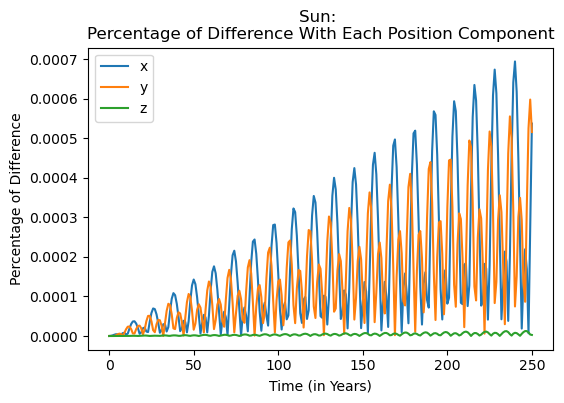

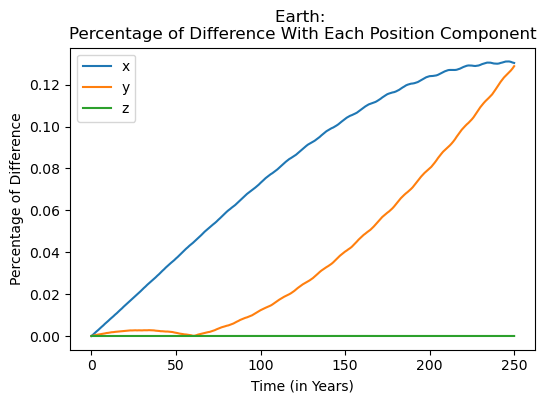

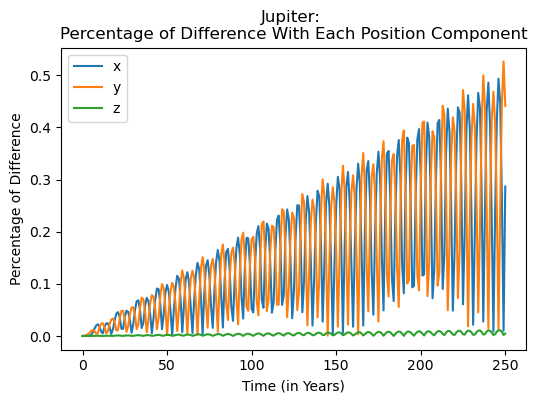

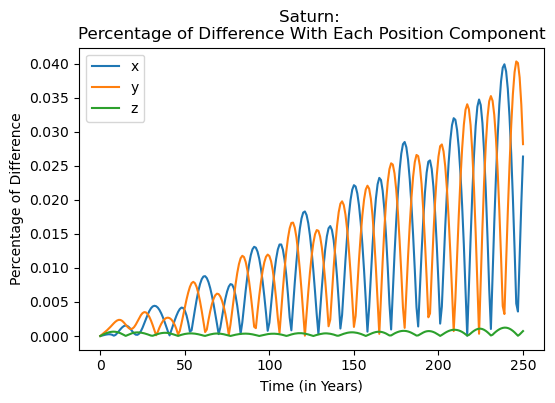

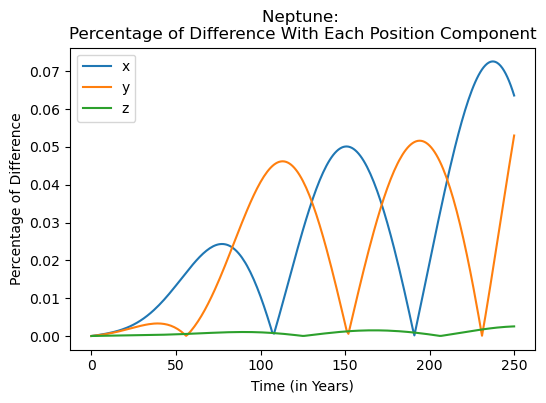

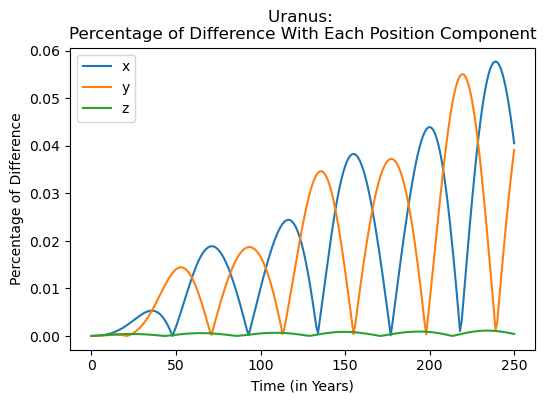

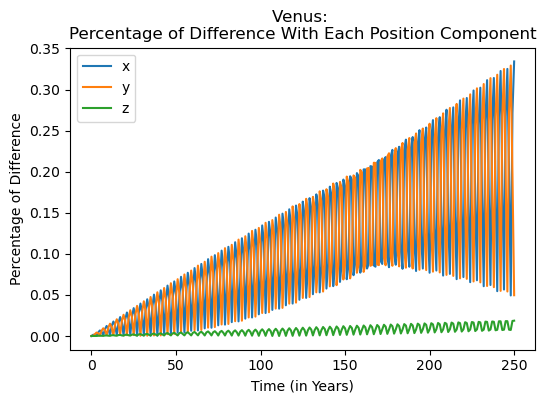

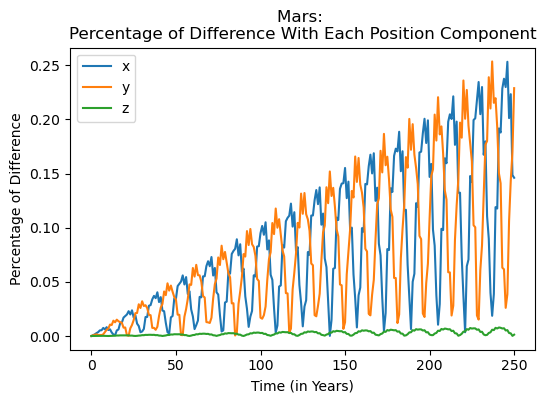

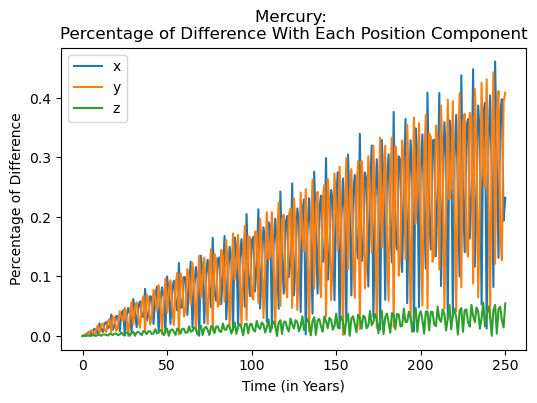

In [48]:
for body in bodies:
#     print(body)
    df = pd.read_csv(accuracy_folder + "/%s.csv"%(body))
#     display(df)
    
    plt.figure(dpi = 100)
    plt.plot(df['year'], df['percentage_diff_x'], label = 'x')
    plt.plot(df['year'], df['percentage_diff_y'], label = 'y')
    plt.plot(df['year'], df['percentage_diff_z'], label = 'z')
#     plt.ylim(0, 100)
    plt.legend()
    plt.xlabel("Time (in Years)")
    plt.ylabel("Percentage of Difference")
    plt.title("%s: \nPercentage of Difference With Each Position Component"%(body.capitalize()))
    plt.show()

[827640.0, 149600000.0, 778338880.0, 1427004480.0, 4497140560.0, 2871033440.0, 108205680.00000001, 228484080.00000003, 57910160.0]


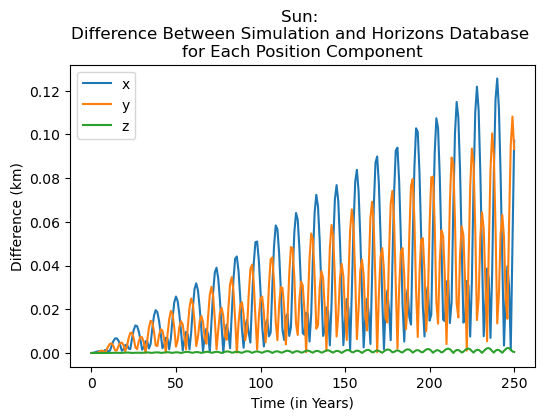

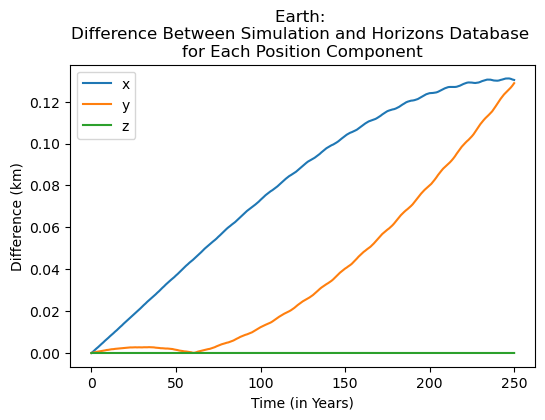

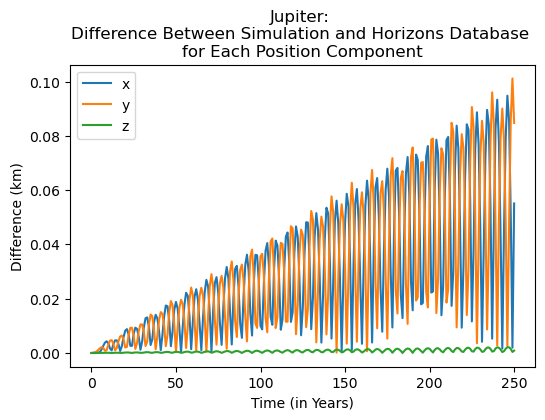

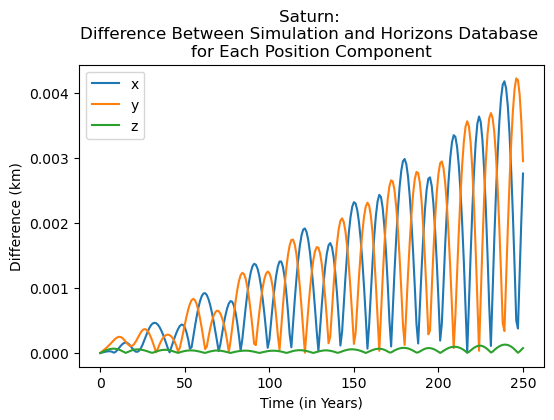

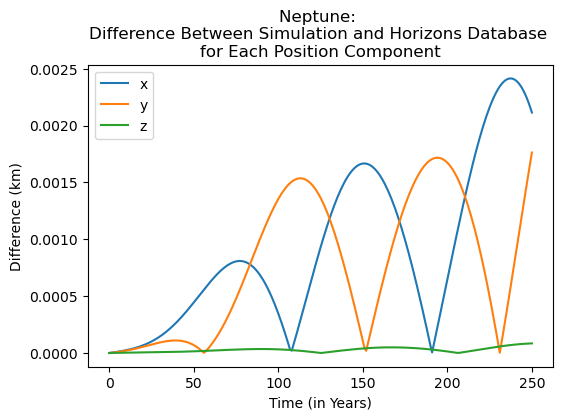

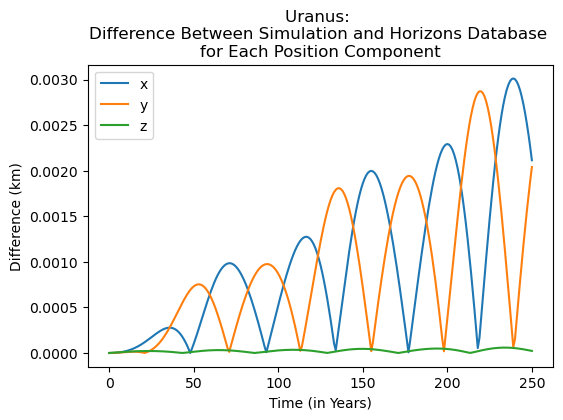

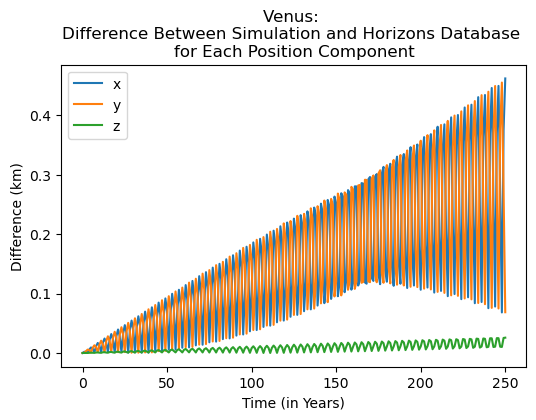

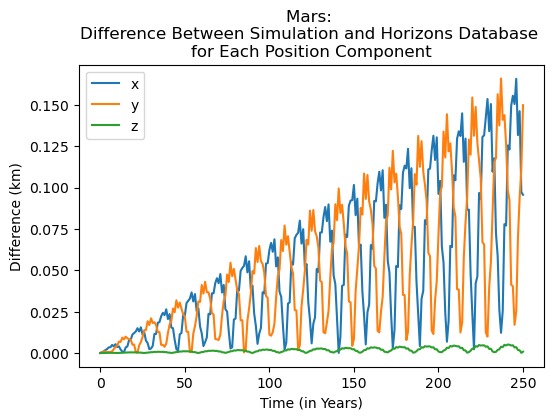

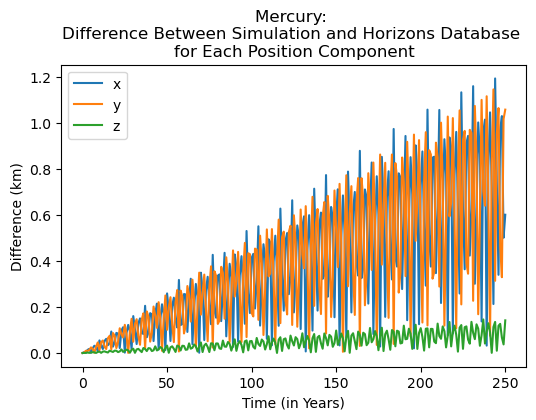

In [49]:
# now plot difference as a percentage of the planet usual orbit (length of semi major axis)
# biggest orbit for ['sun', 'earth', 'jupiter', 'saturn', 'neptune', 'uranus', 'venus', 'mars', 'mercury']
orbits_2 = [827640/AU, 1.000, 5.2028, 9.5388, 30.0611, 19.1914, 0.7233, 1.5273, 0.3871]
orbits_2 = [i * AU for i in orbits_2]
print(orbits_2)

ind = 0
for body in bodies:
#     print(body)
    df = pd.read_csv(accuracy_folder + "/%s.csv"%(body))
    
    plt.figure(dpi = 100)
    plt.plot(df['year'], df['percentage_diff_x']*AU/orbits_2[ind], label = 'x')
    plt.plot(df['year'], df['percentage_diff_y']*AU/orbits_2[ind], label = 'y')
    plt.plot(df['year'], df['percentage_diff_z']*AU/orbits_2[ind], label = 'z')
    plt.legend()
    plt.xlabel("Time (in Years)")
    if no_divide == True:
        plt.ylabel("Difference (km)")
        plt.title("%s: \nDifference Between Simulation and Horizons Database \nfor Each Position Component"%(body.capitalize()))
    else:
#         plt.ylim(0, 100)
        plt.ylabel("Percentage of Difference (%)")
        plt.title("%s: \nPercentage of Difference With Each Position Component"%(body.capitalize()))
    plt.show()
    ind += 1


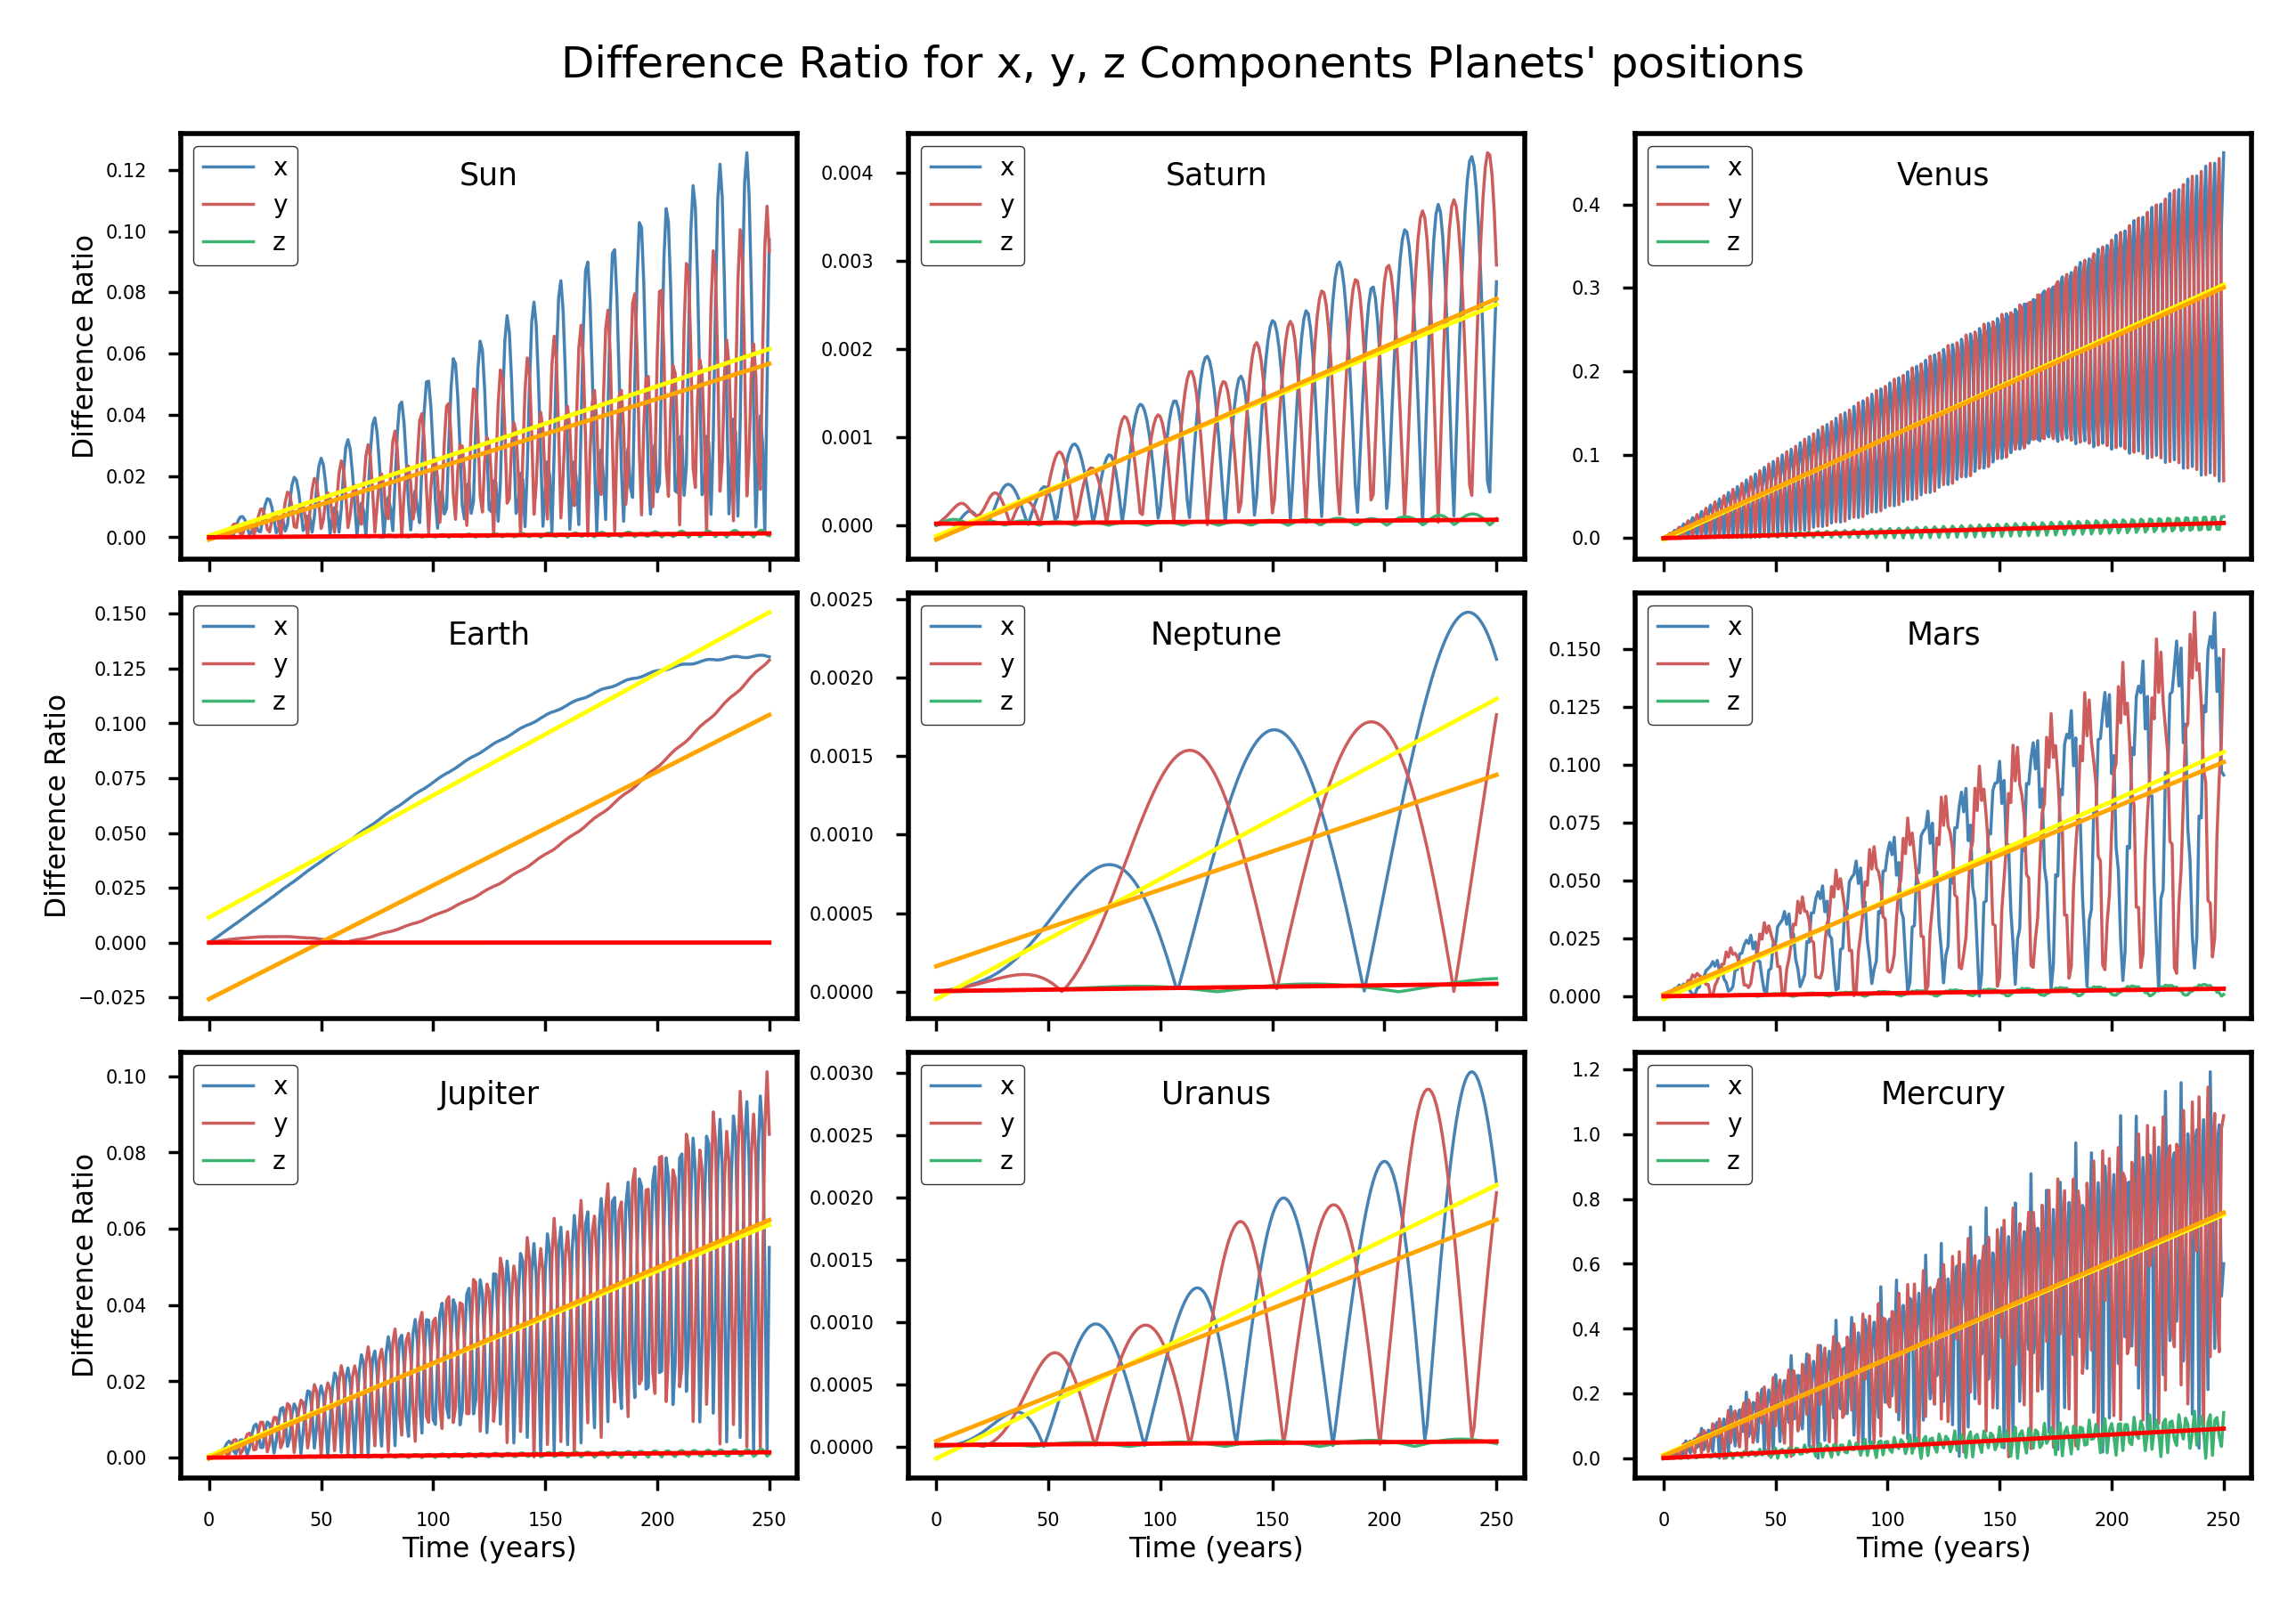

In [52]:
# now find the trends with linear regression
a_x = []
a_y = []
a_z = []
b_x = []
b_y = []
b_z = []

if no_divide:
    figure, ax = plt.subplots(3, 3)
    figure.set_dpi(500)
    i_h = [0, 1, 2, 0, 1, 2, 0, 1, 2]
    i_v = [0, 0, 0, 1, 1, 1, 2, 2, 2]
    ind = 0
    for body in bodies:
    #     print(body)
        df = pd.read_csv(accuracy_folder + "/%s.csv"%(body))
        ax[i_h[ind]][i_v[ind]].plot(df['year'], df['percentage_diff_x']*AU/orbits_2[ind], label = 'x', linewidth = 0.5, c = "steelblue")
        a, b = np.polyfit(df['year'], df['percentage_diff_x']*AU/orbits_2[ind], 1)
        a_x.append(a)
        b_x.append(b)
        ax[i_h[ind]][i_v[ind]].plot(df['year'], df['percentage_diff_y']*AU/orbits_2[ind], label = 'y', linewidth = 0.5, c = "indianred")
        a, b = np.polyfit(df['year'], df['percentage_diff_y']*AU/orbits_2[ind], 1)
        a_y.append(a)
        b_y.append(b)
        ax[i_h[ind]][i_v[ind]].plot(df['year'], df['percentage_diff_z']*AU/orbits_2[ind], label = 'z', linewidth = 0.5, c = "mediumseagreen")
        a, b = np.polyfit(df['year'], df['percentage_diff_z']*AU/orbits_2[ind], 1)
        a_z.append(a)
        b_z.append(b)
        
        # now display the 3 regression lines
        x_axis = [0, n_compare]
        y_axis_x = [a_x[-1] * i + b_x[-1] for i in x_axis]
        y_axis_y = [a_y[-1] * i + b_y[-1] for i in x_axis]
        y_axis_z = [a_z[-1] * i + b_z[-1] for i in x_axis]
        ax[i_h[ind]][i_v[ind]].plot(x_axis, y_axis_x, c = 'yellow', linewidth = 0.7)
        ax[i_h[ind]][i_v[ind]].plot(x_axis, y_axis_y, c = 'orange', linewidth = 0.7)
        ax[i_h[ind]][i_v[ind]].plot(x_axis, y_axis_z, c = 'red', linewidth = 0.7)
        
        
        
        leg = ax[i_h[ind]][i_v[ind]].legend(fontsize="4")
        leg.get_frame().set_linewidth(0.2)
        leg.get_frame().set_edgecolor('k')

        if i_h[ind] == 2:
            ax[i_h[ind]][i_v[ind]].set_xlabel("Time (years)", fontsize=4.5, labelpad=1)

        ax[i_h[ind]][i_v[ind]].tick_params('both', length=2, width=0.5)
        ax[i_h[ind]][i_v[ind]].tick_params(axis='x', labelsize=3)
        ax[i_h[ind]][i_v[ind]].tick_params(axis='y', labelsize=3)
        
        if i_v[ind] == 0:
            ax[i_h[ind]][i_v[ind]].set_ylabel("Difference Ratio", fontsize=4.5, labelpad=1)
        plt.text(0.5, 0.9, body.capitalize(), horizontalalignment='center',verticalalignment='center', transform= ax[i_h[ind]][i_v[ind]].transAxes, fontsize = 5)
        ind += 1
    figure.subplots_adjust(hspace=0.08)
    figure.subplots_adjust(wspace=0.18)
    plt.suptitle("Difference Ratio for x, y, z Components Planets' positions", fontsize = 7, y = 0.93)
    plt.savefig(output_graph_file, dpi = 500)
    plt.show()

In [35]:
print(a_x)
print(a_y)
print(a_z)

[0.0003710589348529702, 0.0005753212536579742, 0.00024263832076418595, 1.0775756953464229e-05, 7.571556600185516e-06, 8.906108297680581e-06, 0.0013493700876349888, 0.00042818108018897566, 0.004874557611084167]
[0.00022764391777427932, 0.0005345423870279181, 0.00025020287867590183, 1.1192143078482424e-05, 4.816333826343659e-06, 7.1933455170140845e-06, 0.0013255388891690576, 0.00040287893625707763, 0.004788039369652502]
[5.893310304142764e-06, 2.6774960212709197e-08, 5.575203180163033e-06, 1.9132884206791228e-07, 1.827252866031382e-07, 1.2007628777357672e-07, 7.983840468643751e-05, 1.302807841133314e-05, 0.0005903979123409015]

[0.00024406129023622563, 0.0005567431798111537, 0.00024264291560788083, 1.0512906576179424e-05, 7.635317357455764e-06, 8.79188287509075e-06, 0.0012224405518932305, 0.00042697028360891406, 0.0029615489216317896]
[0.00022975551330090357, 0.0005185584664734416, 0.0002502171831700936, 1.0932113929727458e-05, 4.8700671783369585e-06, 7.115569938349353e-06, 0.0012008639335034602, 0.00040165331935189863, 0.003001318626523558]
[5.120902461115881e-06, 5.020750198211221e-08, 5.575128179834434e-06, 1.7797015133037796e-07, 1.8458121331806453e-07, 1.1800544618054152e-07, 7.280712317539563e-05, 1.2991998224047433e-05, 0.00036367868988091307]


## 3: Timestep = 1 day and FIX THE SUN

In [54]:
interval = 365 # horizon interval in data (days)
n_compare = 250 # number of comparizons to do with horizons data
n_days_timestep = 1 # from simulation. assume we chose n_days_timestep for which we have files at each "interval" days
folder = "positions_250_years_init_01_01_1750_fix_sun"
n_bodies = 9
horizons_file = "horizons_files/horizons_data_1750_250_years.csv"
accuracy_folder = 'accuracies/1750_250_years_fix_sun' # to save accuracy files

# need to get which timesteps want to compare IN DAYS (bc it is how I get horozons data)
day_timesteps = list(range(0, interval * n_compare + 1, interval)) # days
# print(day_timesteps)

# now, these numbers might be different based on the timestep of simulation
simulation_timesteps = [int(i/n_days_timestep) for i in day_timesteps]
# print(simulation_timesteps)

# timesteps = index in horizons files
horizons_timesteps = list(range(n_compare+1))
# print(horizons_timesteps)

# print(len(day_timesteps))
# print(len(simulation_timesteps))
# print(len(horizons_timesteps))

In [55]:
# get trajectories 
x, y, z, bodies = get_positions_from_files(folder, simulation_timesteps, n_bodies)

# get horizons file:
horizons = pd.read_csv(horizons_file)
display(horizons)

position_sun  \
0    -468011.8883121092,151780.3309712668,3952.9530...   
1    -378467.817837759,-185816.5845392546,3795.0700...   
2    -125394.3328832355,-398045.4287013639,-243.998...   
3    189022.7236554295,-421741.1095213876,-6096.524...   
4    456393.5985868843,-263609.1766951701,-11422.87...   
..                                                 ...   
246  -474574.4478357823,1120911.151274877,9275.9994...   
247  -866950.1110097959,954481.4045385986,19788.026...   
248  -1159323.795336588,600178.2608643107,28537.064...   
249  -1255628.851357108,126155.5772284936,32962.713...   
250  -1113888.853894942,-348862.0589613738,31663.05...   

                                          velocity_sun  \
0    -0.0003258233500816845,-0.01163403930534814,6....   
1    0.005864000933944094,-0.009201472520037854,-6....   
2    0.009758550921079738,-0.003802094744023258,-0....   
3    0.009855561903053716,0.002252188473068533,-0.0...   
4    0.006770717680778921,0.007470994543178877,-0.0...   
..                                                 ...   
246  -0.01293637972320619,-0.002071530007355724,0.0...   
247  -0.0112901105649106,-0.00846103664742044,0.000...   
248  -0.006532155816813131,-0.01382142513569154,0.0...   
249  0.0006798214817571041,-0.01575201778216168,5.8...   
250  0.008290406330901003,-0.01374683912243877,-0.0...   

                                        position_earth  \
0    -36208597.47896259,142827245.8730925,84067.570...   
1    -35484154.71740879,142655329.4191826,82526.321...   
2    -34573826.13109529,142590642.7656642,78695.383...   
3    -33599886.91363302,142729359.2515553,72660.910...   
4    -32695892.68111963,143037655.1538401,67139.320...   
..                                                 ...   
246  112966634.4159214,96821083.59978852,10110.6628...   
247  113013453.8325714,96149269.14523873,21180.3375...   
248  113157869.8982592,95299653.70851825,28909.1890...   
249  113485784.0851523,94320526.10347451,33428.5911...   
250  114061417.8559825,93330768.70251065,31216.4908...   

                                        velocity_earth  \
0    -29.38923058167892,-7.345469879141083,-0.00544...   
1    -29.41808679472956,-7.233285683621293,-0.00604...   
2    -29.42710533351322,-7.084554502874352,-0.00447...   
3    -29.48151777915633,-6.93995292844524,-0.006522...   
4    -29.50648025201293,-6.822656983615272,-0.00444...   
..                                                 ...   
246  -19.70964837641263,22.6433873013304,0.00137729...   
247  -19.59239630782811,22.73962645441382,0.0001558...   
248  -19.50504513561513,22.82121879338824,1.3088455...   
249  -19.38197651312552,22.88383522233716,0.0010153...   
250  -19.26760946149682,22.99430527872656,-0.001180...   

                                      position_jupiter  \
0    734795831.9718618,87840456.21468413,-16884627....   
1    567492037.6209549,479833057.4648454,-14673829....   
2    222896222.2906426,722943206.5829668,-7884390.8...   
3    -189058698.1559705,752238179.2962409,1267923.4...   
4    -550211233.0120993,573567697.8528115,10101756....   
..                                                 ...   
246  -98785983.8008579,-784060690.323298,5460665.08...   
247  299362935.0809696,-710022607.5612104,-3761199....   
248  612044631.7931895,-437283060.3750183,-11891798...   
249  740082337.8623972,-34223166.89477238,-16427470...   
250  636087243.9608077,379079143.5752778,-15810841....   

                                      velocity_jupiter  \
0    -1.711418927962744,13.59088723021772,-0.015433...   
1    -8.596765590317471,10.59821530525294,0.1514136...   
2    -12.64865850697126,4.469253733195212,0.2668445...   
3    -12.83292728320907,-2.570339831476224,0.298891...   
4    -9.586942650858056,-8.432123319018292,0.249167...   
..                                                 ...   
246  12.79134878447332,-1.019257355115281,-0.282192...   
247  11.86340989520472,5.687770865769404,-0.2892525...   
248  7.420111683094178,11.240288208

In [58]:
for i_body in range(len(bodies)):
    years = []
    percentages_x = []
    percentages_y = []
    percentages_z = []
    
    # print(bodies[i_body])
    data_horizons = horizons["position_%s"%(bodies[i_body])]
    # display(data_horizons)
    for i_timestep in horizons_timesteps:
        # print("index timestep:", i_timestep)
        position = data_horizons[i_timestep].split(",")
        position = [float(i)/AU for i in position]

        x_body = x[i_body][i_timestep]
        y_body = y[i_body][i_timestep]
        z_body = z[i_body][i_timestep]
        
#         p_diff_x, p_diff_y, p_diff_z = compare_horizons(x_body, y_body, z_body, position)
        p_diff_x, p_diff_y, p_diff_z = compare_horizons_no_divide(x_body, y_body, z_body, position)
        
        # print("Year %i: x: %0.2f y: %0.2f z: %0.2f"%(i_timestep, p_diff_x, p_diff_y, p_diff_z))
        
        years.append(i_timestep)
        percentages_x.append(p_diff_x)
        percentages_y.append(p_diff_y)
        percentages_z.append(p_diff_z)
    
    # now store
    df = pd.DataFrame()
    df["year"] = years
    df["percentage_diff_x"] = percentages_x
    df["percentage_diff_y"] = percentages_y
    df["percentage_diff_z"] = percentages_z
    
    # display(df)
    
    df.to_csv(accuracy_folder + "/%s.csv"%(bodies[i_body]), index = False)

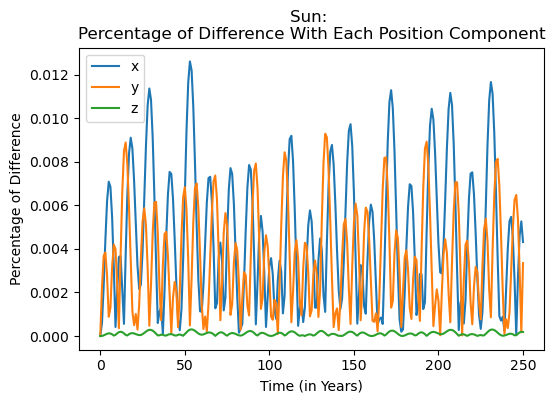

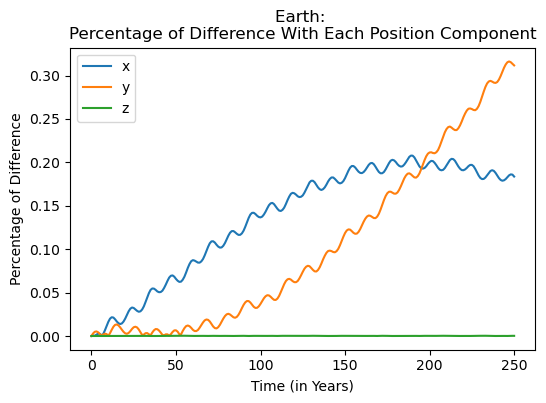

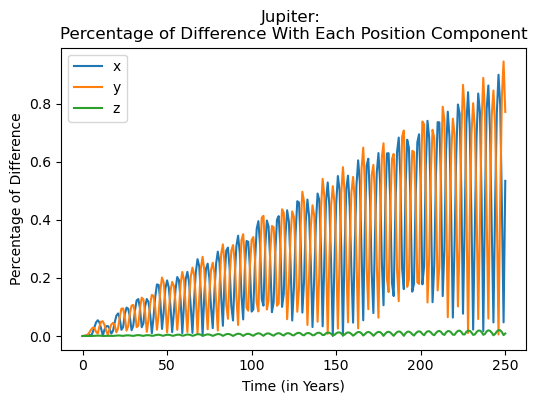

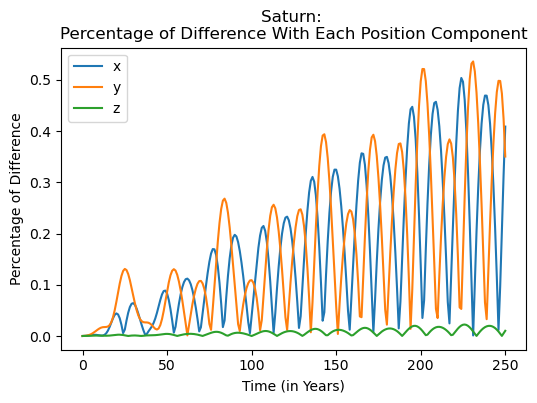

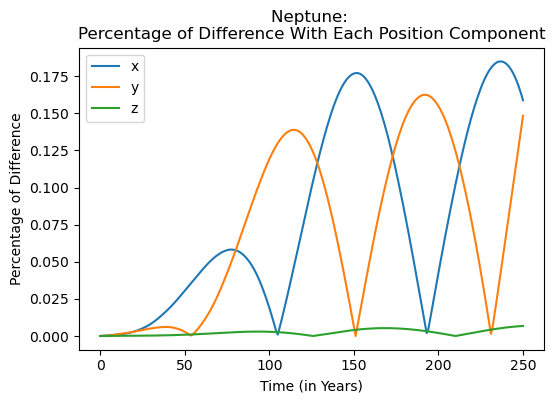

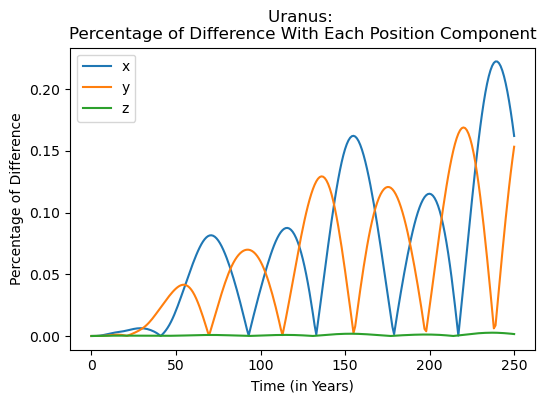

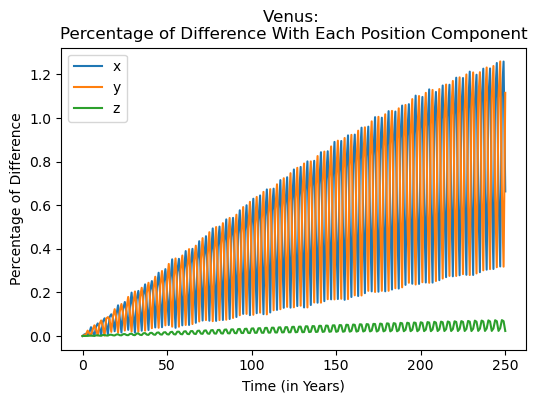

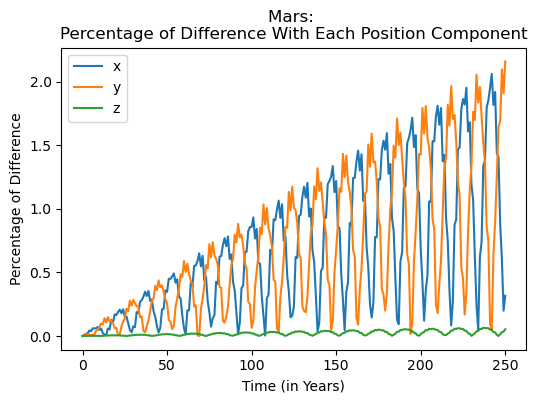

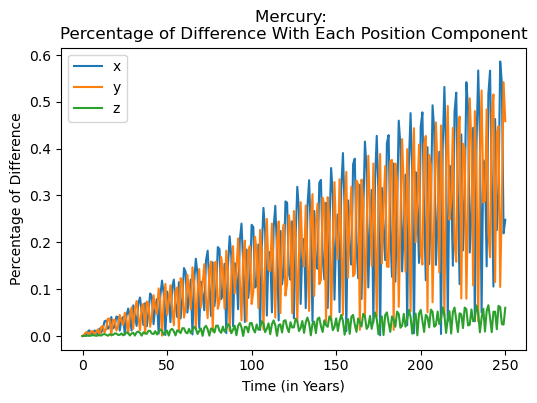

In [60]:
for body in bodies:
#     print(body)
    df = pd.read_csv(accuracy_folder + "/%s.csv"%(body))
#     display(df)
    
    plt.figure(dpi = 100)
    plt.plot(df['year'], df['percentage_diff_x'], label = 'x')
    plt.plot(df['year'], df['percentage_diff_y'], label = 'y')
    plt.plot(df['year'], df['percentage_diff_z'], label = 'z')
#     plt.ylim(0, 100)
    plt.legend()
    plt.xlabel("Time (in Years)")
    plt.ylabel("Percentage of Difference")
    plt.title("%s: \nPercentage of Difference With Each Position Component"%(body.capitalize()))
    plt.show()